In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

#### Load data 

In [2]:
train=pd.read_csv("train_predict_loan_AV.csv")
test=pd.read_csv("test_predict_load_AV.csv")

# From problem statement.

Variable	                            Description
Loan_ID	                               Unique Loan ID
Gender	                               Male/ Female
Married	                               Applicant married (Y/N)
Dependents	                           Number of dependents
Education	                           Applicant Education (Graduate/ Under Graduate)
Self_Employed	                       Self employed (Y/N)
ApplicantIncome	                       Applicant income
CoapplicantIncome	                   Coapplicant income
LoanAmount	                           Loan amount in thousands
Loan_Amount_Term	                   Term of loan in months
Credit_History	                       credit history meets guidelines
Property_Area	                       Urban/ Semi Urban/ Rural
Loan_Status	                          (Target) Loan approved (Y/N)




#### Looking at data 

In [3]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
train.shape

(614, 13)

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
for feature in train.columns:
    print('{} feature:----> {} unique values'.format(feature,len(train[feature].value_counts())))

Loan_ID feature:----> 614 unique values
Gender feature:----> 2 unique values
Married feature:----> 2 unique values
Dependents feature:----> 4 unique values
Education feature:----> 2 unique values
Self_Employed feature:----> 2 unique values
ApplicantIncome feature:----> 505 unique values
CoapplicantIncome feature:----> 287 unique values
LoanAmount feature:----> 203 unique values
Loan_Amount_Term feature:----> 10 unique values
Credit_History feature:----> 2 unique values
Property_Area feature:----> 3 unique values
Loan_Status feature:----> 2 unique values


#### Continuous Varibale: Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
#### rest are categorical


#### Now lets explore missing values

### Lets do univarite analysis

In [130]:
def univariate(df ,column):
    plt.figure()
    ax=sns.countplot(data=df,x=column,palette='Set2')
    total=df.shape[0]
    
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total)*100),
            ha="center") 
    plt.title("count and % of {} feature".format(column))

In [131]:
## first let have look at categorical variable

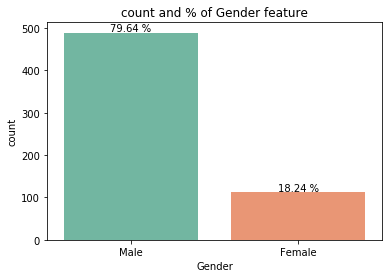

In [132]:
univariate(train,'Gender')

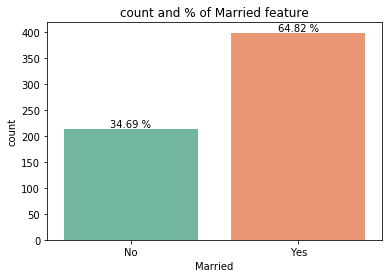

In [133]:
univariate(train,'Married')

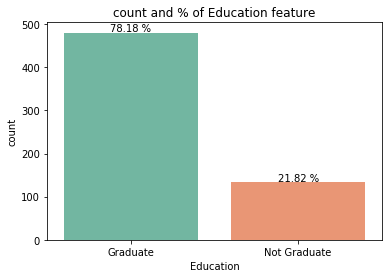

In [134]:
univariate(train,'Education')

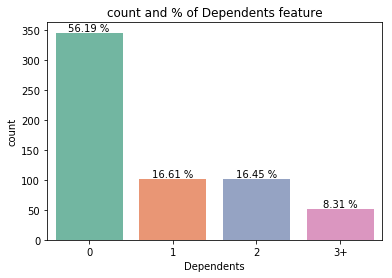

In [135]:
univariate(train,'Dependents')

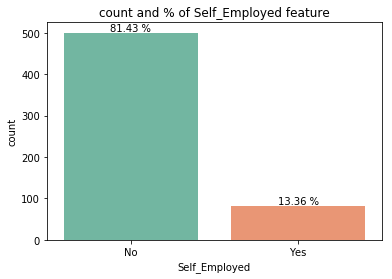

In [136]:
univariate(train,'Self_Employed')

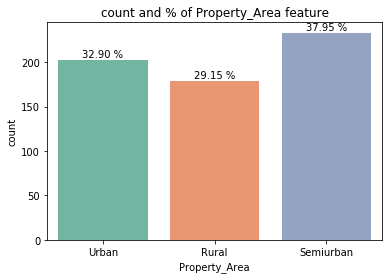

In [137]:
univariate(train,'Property_Area')

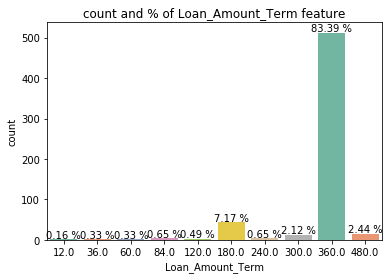

In [138]:
univariate(train,'Loan_Amount_Term')

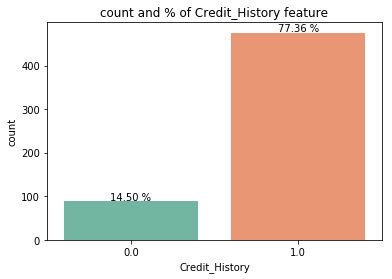

In [139]:
univariate(train,'Credit_History')

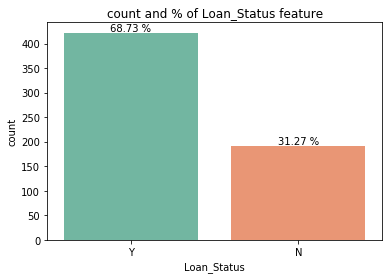

In [140]:
univariate(train,'Loan_Status')

### observation :
'''' 
1. there is relative high percentage of male (>75%) who applied for Home Loan as comopared to its female counter part
2. More Married people applied
3. more then 3/4 of applicants are graduate
4. More then half of the applicants has no dependents
5. More the 80% are not self_employed
6. people having property in every area (rural ,semi-urban,urban ) applied with no major significant differnce in numbers
7. Almost 80% meets the guidelines
8. Most of the applicants were given Loan
'''

### Let's Look at summary statistics 

In [143]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [144]:
### now lets explore continuos varible with distplot

In [145]:
def continuous(df,column):
    plt.figure(figsize=(20,10)) 
    ax=sns.distplot(df[column],rug=True,bins=50,norm_hist=False)
    plt.title('Distribution of {}'.format(column))
    #loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    #ax.xaxis.set_major_locator(loc)
    
    

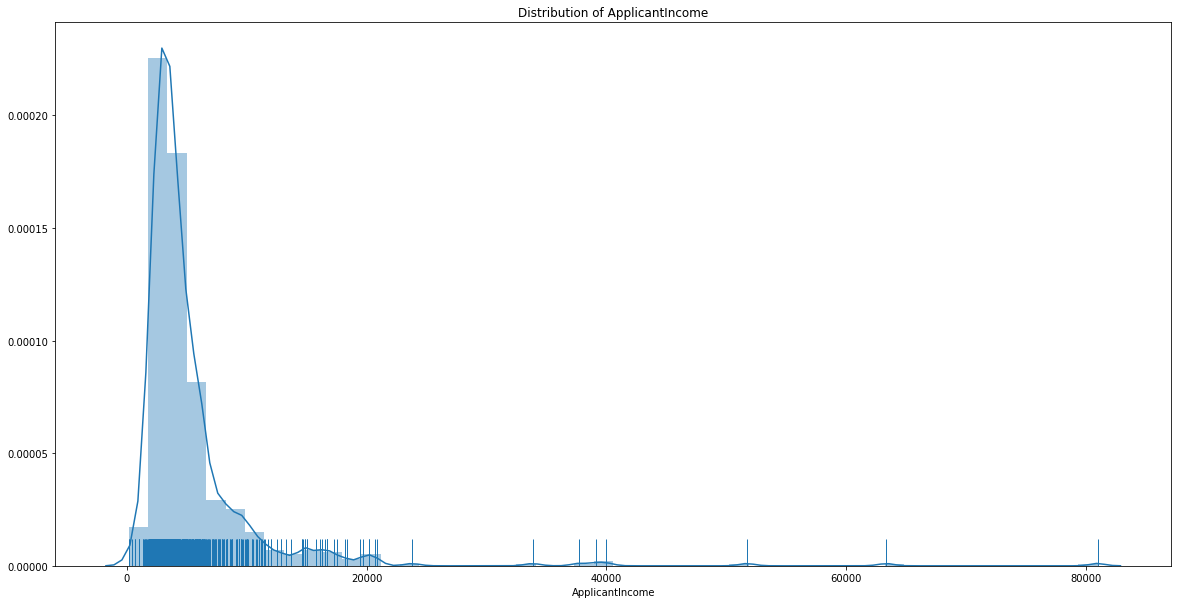

In [146]:
continuous(train,"ApplicantIncome")

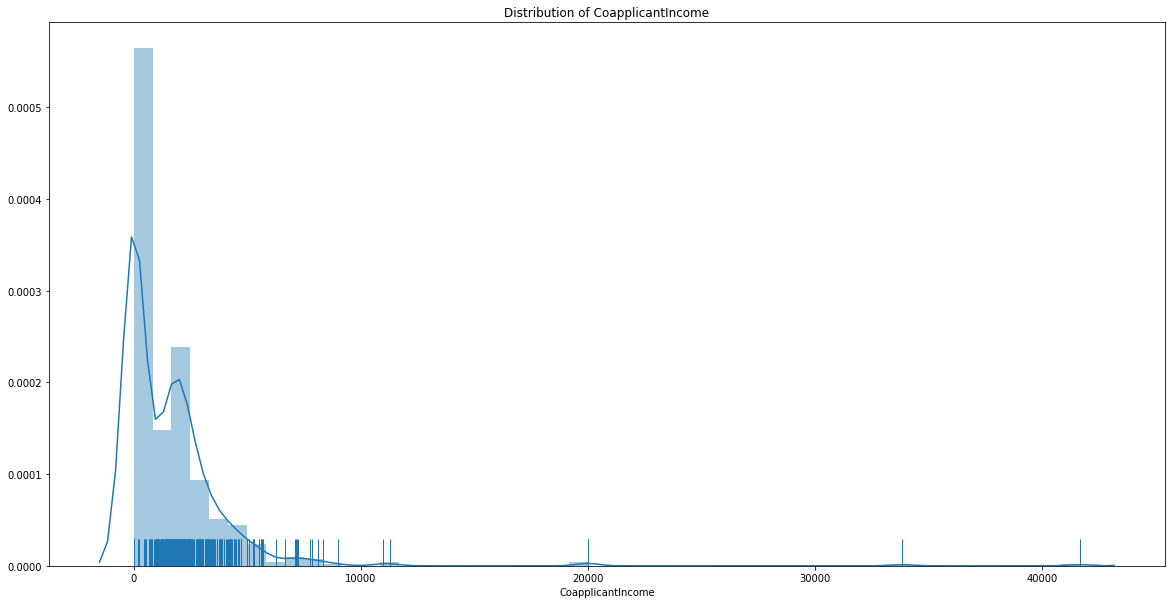

In [147]:
continuous(train,"CoapplicantIncome")

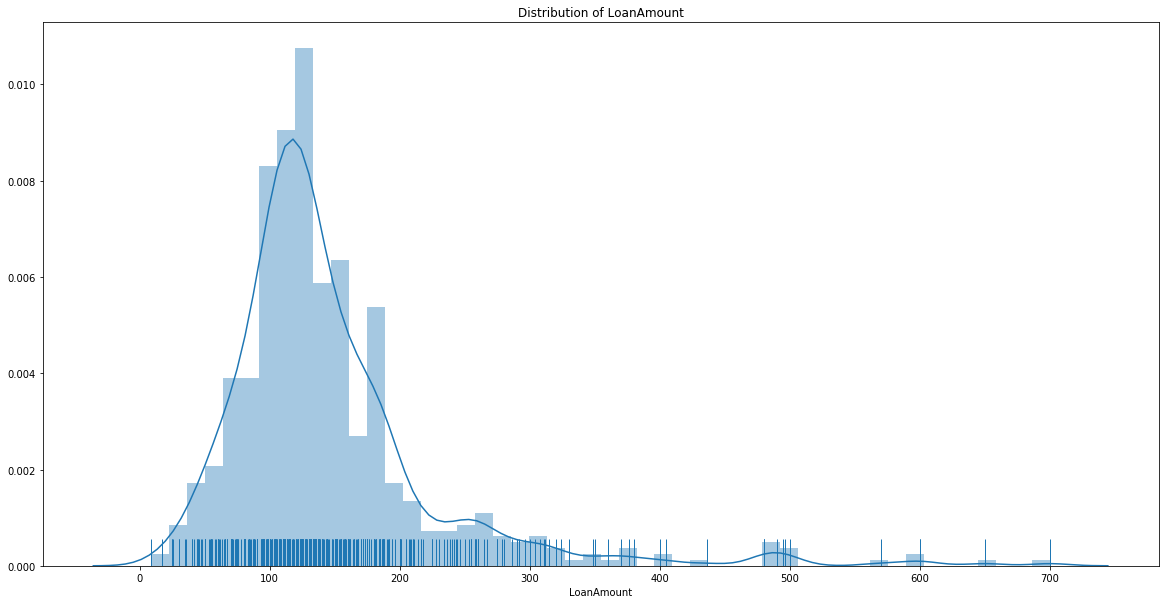

In [148]:
continuous(train,"LoanAmount");


''''
1. All three of continuous variable has outliers
2. ApplicantIncome and 'CoapplicantIncome' are skewed towards right and need tranformation for better prediction model
''''


In [152]:
#### Now lets do bivariate analysis taking each feature corresponding target variable(Loan_Status)


#### starting with categorical feature

In [153]:
def bivariate(df ,column,target):
    plt.figure()
    ax=sns.countplot(data=df,x=target,hue=column,dodge=True,palette="pastel")
    total=df.shape[0]
    
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total)*100),
            ha="center") 
    plt.title("count and % of {} feature".format(column))

In [154]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
target="Loan_Status"

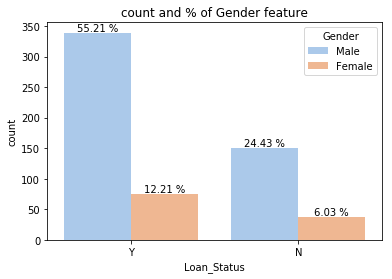

In [156]:
bivariate(train,"Gender",target)

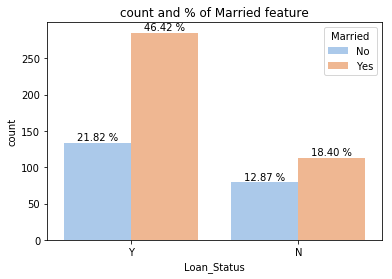

In [157]:
bivariate(train,"Married",target)

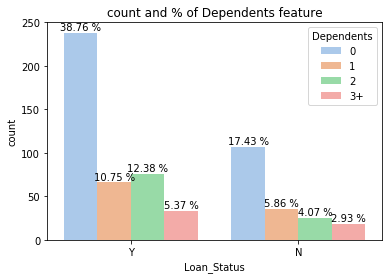

In [158]:
bivariate(train,"Dependents",target)

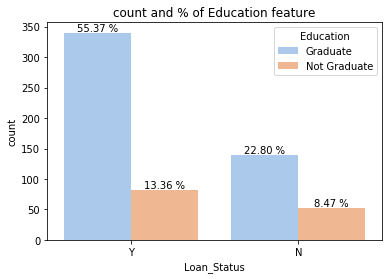

In [159]:
bivariate(train,"Education",target)

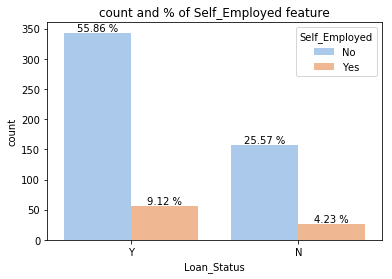

In [160]:
bivariate(train,"Self_Employed",target)

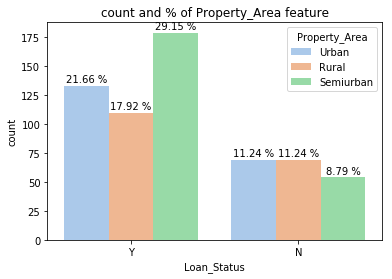

In [162]:
bivariate(train,"Property_Area",target)

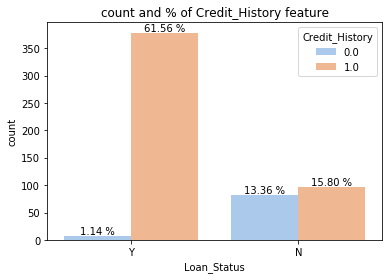

In [163]:
bivariate(train,"Credit_History",target)

In [ ]:
### Observations
''''
1. The number of Loan 
2.
3.
''''

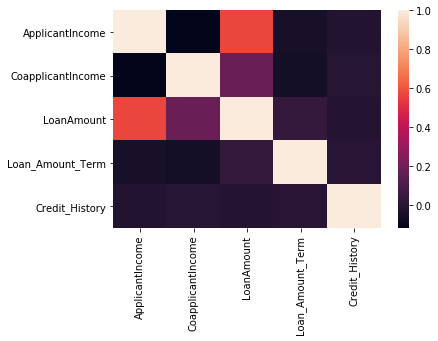

In [56]:
sns.heatmap(train.corr())

In [57]:
((train['LoanAmount']*1000)/train['Loan_Amount_Term'])/12

0             NaN
1       29.629630
2       15.277778
3       27.777778
4       32.638889
5       61.805556
6       21.990741
7       36.574074
8       38.888889
9       80.787037
10      16.203704
11      25.231481
12      46.296296
13      26.388889
14      11.805556
15      28.935185
16      34.722222
17      17.592593
18      30.787037
19            NaN
20      24.074074
21      72.916667
22      26.851852
23      25.925926
24      34.953704
25      44.212963
26      28.240741
27      25.462963
28       8.101852
29      27.777778
          ...    
584     33.796296
585    170.634921
586     24.074074
587     16.203704
588     21.759259
589     24.537037
590     25.925926
591     71.180556
592     67.592593
593     65.740741
594     60.185185
595     25.462963
596     43.287037
597     20.370370
598     41.666667
599     44.444444
600    162.037037
601     35.879630
602     29.629630
603     39.814815
604    114.814815
605           NaN
606     40.046296
607     36.342593
608     25

In [59]:
train[train['Loan_Amount_Term']>['Loan_Amount']

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6      30.0
7      30.0
8      20.0
9      30.0
10     30.0
11     30.0
12     15.0
13     30.0
14     30.0
15     30.0
16     30.0
17     30.0
18     30.0
19     15.0
20     30.0
21     15.0
22     30.0
23     30.0
24     30.0
25     30.0
26     30.0
27     30.0
28     30.0
29     15.0
       ... 
337    30.0
338    20.0
339    30.0
340    15.0
341    30.0
342    15.0
343    30.0
344    30.0
345    30.0
346    30.0
347    30.0
348    30.0
349    25.0
350    30.0
351    30.0
352    30.0
353    30.0
354    15.0
355    30.0
356    30.0
357    30.0
358    30.0
359    30.0
360    30.0
361    30.0
362    30.0
363    30.0
364    30.0
365    30.0
366    15.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

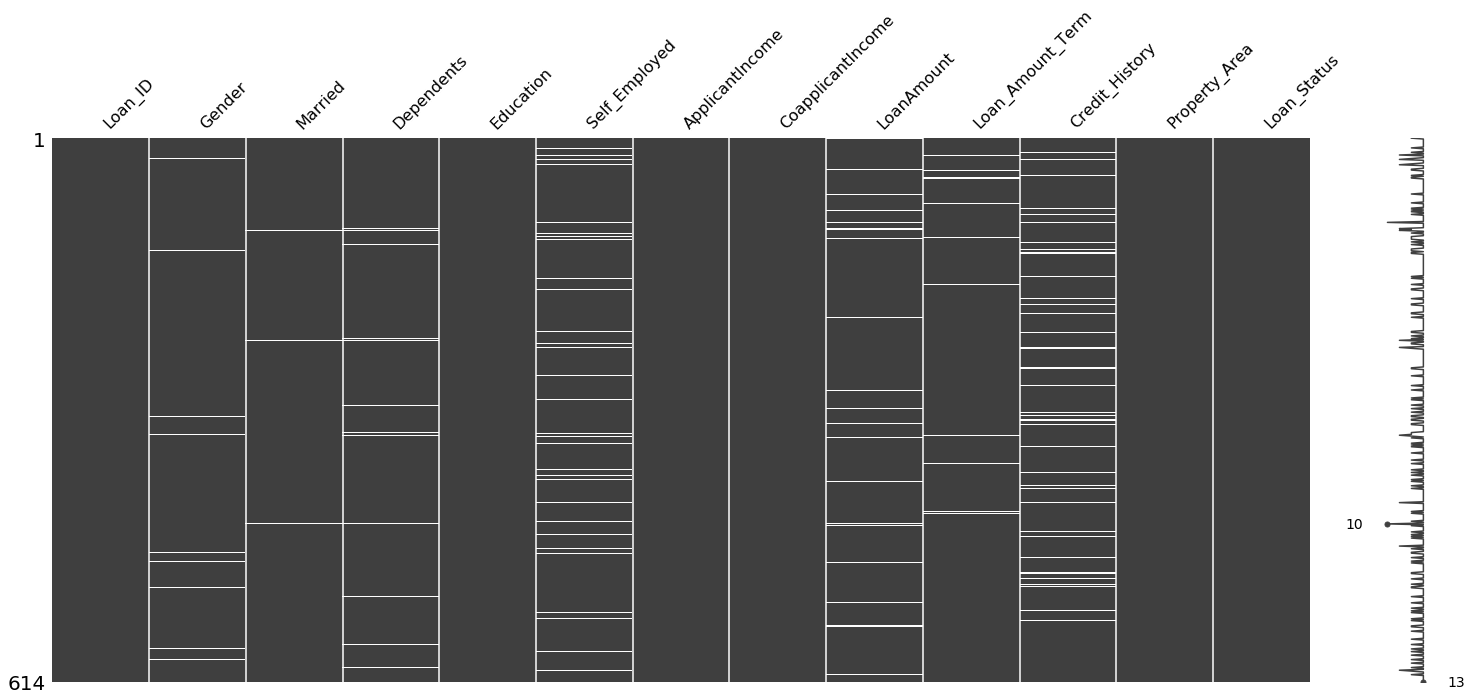

In [9]:
ms.matrix(train)

In [10]:
def calculate_missing_percent(df):
    missing=pd.DataFrame()
    percentage=[]
    count=[]
    total_record=len(df)
    for feature in df.columns:
        cnt=df[feature].isna().sum()
        cal=cnt/total_record
        percentage.append(cal*100)
        count.append(cnt)
    missing['feature']=df.columns
    missing['count of missing values']=count
    missing['missing %']=percentage
    return missing
        
    

In [11]:
calculate_missing_percent(train)

,feature,count of missing values,missing %
0,Loan_ID,0,0.000000
1,Gender,13,2.117264
2,Married,3,0.488599
3,Dependents,15,2.442997
4,Education,0,0.000000
5,Self_Employed,32,5.211726
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
8,LoanAmount,22,3.583062
9,Loan_Amount_Term,14,2.280130


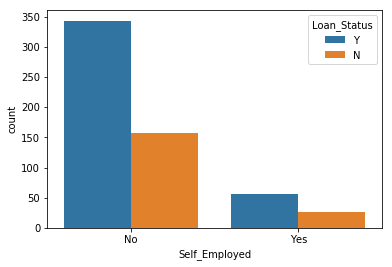

In [12]:
sns.countplot(train['Self_Employed'],hue=train['Loan_Status'])

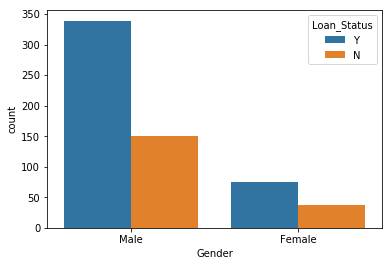

In [13]:
sns.countplot(train['Gender'],hue=train['Loan_Status'])

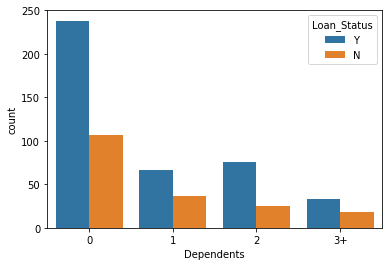

In [14]:
sns.countplot(train['Dependents'],hue=train['Loan_Status'])

####  approval of Loan is no way dependent on the Gender of the applicant ,hence will drop
####  similar to that Married status is also not a factor in Loan_approval ,we will drop this after exploring it a little more.

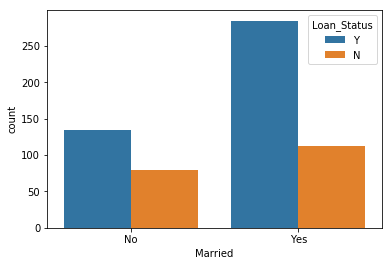

In [15]:
sns.countplot(train['Married'],hue=train['Loan_Status'])

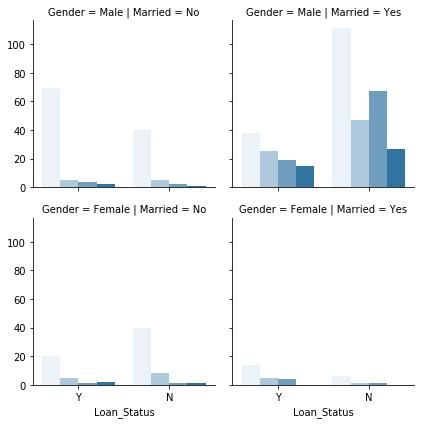

In [16]:
relation = sns.FacetGrid(train, col="Married",  row="Gender",legend_out=True)
relation.map(sns.countplot,'Loan_Status',hue=train['Dependents'],order=None)

In [17]:
train.shape

(614, 13)

In [37]:
def univariate(df ,column):
    plt.figure()
    ax=sns.countplot(data=df,x=column)
    total=df.shape[0]
    
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total)*100),
            ha="center") 
    plt.title("count and % of {} feature".format(column))

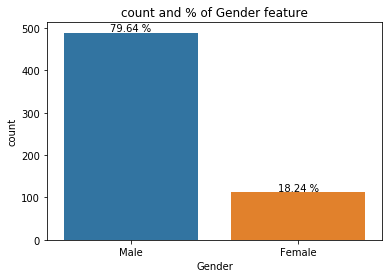

In [38]:
univariate(train,"Gender")

In [20]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
train['Loan_ID']

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
5      LP001011
6      LP001013
7      LP001014
8      LP001018
9      LP001020
10     LP001024
11     LP001027
12     LP001028
13     LP001029
14     LP001030
15     LP001032
16     LP001034
17     LP001036
18     LP001038
19     LP001041
20     LP001043
21     LP001046
22     LP001047
23     LP001050
24     LP001052
25     LP001066
26     LP001068
27     LP001073
28     LP001086
29     LP001087
         ...   
584    LP002911
585    LP002912
586    LP002916
587    LP002917
588    LP002925
589    LP002926
590    LP002928
591    LP002931
592    LP002933
593    LP002936
594    LP002938
595    LP002940
596    LP002941
597    LP002943
598    LP002945
599    LP002948
600    LP002949
601    LP002950
602    LP002953
603    LP002958
604    LP002959
605    LP002960
606    LP002961
607    LP002964
608    LP002974
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 6